In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs) 

Text(0,0.5,'Magnitud')

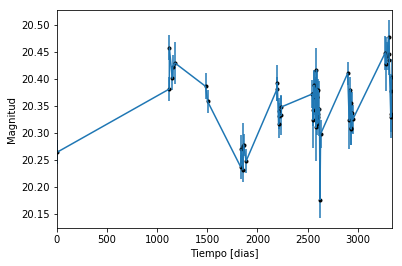

In [3]:
data = np.genfromtxt('LC_20907_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')

In [4]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [5]:
%%capture capt
sample = model.run_mcmc(20000)

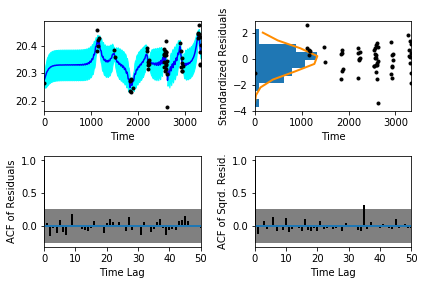

In [6]:
sample.assess_fit()

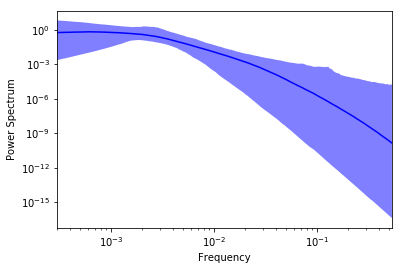

In [7]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [8]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000374595,0.0783259,'Medida del nivel de ruido')

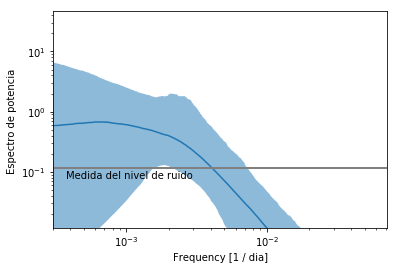

In [9]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

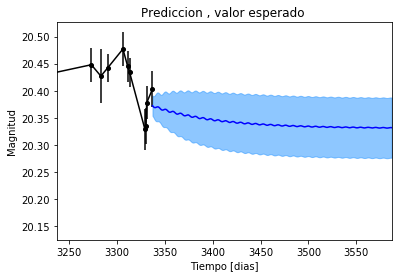

In [10]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

Text(0.5,1,'Prediccion, Caminos simulados')

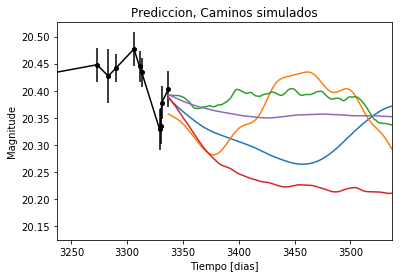

In [11]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


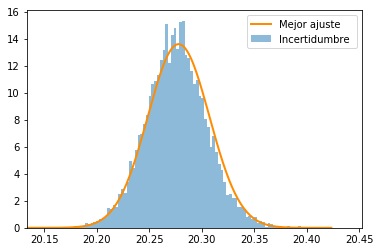

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

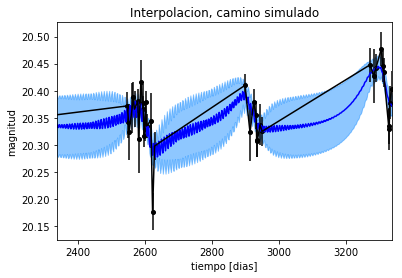

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

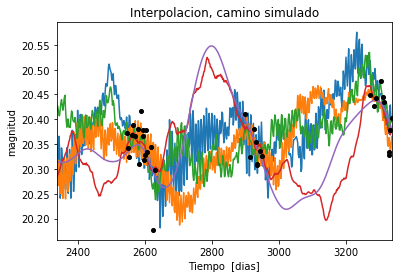

In [14]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 375.647345875
Median: 0.00903151147867
Standard deviation: 0.186140963955
68% credibility interval: [ 0.00083359  0.14621613]
95% credibility interval: [  3.60201449e-04   7.52576153e-01]
99% credibility interval: [  3.09294154e-04   9.79983830e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 617.468561161
Median: 0.00301559851307
Standard deviation: 0.0905676808467
68% credibility interval: [ 0.00059856  0.03525941]
95% credibility interval: [ 0.00033651  0.28771361]
99% credibility interval: [  3.08145447e-04   7.06652698e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 369.78475581
Median: 0.0260547245083
Standard 

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1015.8583747
Median: 121.523728707
Standard deviation: 1.63276561488
68% credibility interval: [ 119.75334606  122.68340689]
95% credibility interval: [ 117.27148231  123.59134033]
99% credibility interval: [ 115.17329775  124.90923166]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 756.798152968
Median: 0.592464476264
Standard deviation: 2.31409703557
68% credibility interval: [ 0.07947716  4.00163778]
95% credibility interval: [ 0.01643691  7.74506211]
99% credibility interval: [  1.06545544e-02   1.10276149e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 453.180152381
Median: 0.478588612303
Standard deviation: 9.89537660231
68% credibility interval: [ 0.01400217  9.03790027]
95% credibility interval: [  1.3

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1601.07417522
Median: 1.25968576015e-11
Standard deviation: 2.29686639535e+100
68% credibility interval: [  1.39331943e-118   2.60625463e+038]
95% credibility interval: [  3.04299819e-172   6.64369662e+065]
99% credibility interval: [  5.20042684e-199   5.98109408e+086]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3499.68891528
Median: 20.3461058074
Standard deviation: 0.0272052216492
68% credibility interval: [ 20.32276714  20.36870081]
95% credibility interval: [ 20.28907166  20.3976218 ]
99% credibility interval: [ 20.25330191  20.42492441]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 882.450387315
Median: 0.0136190009999
Standard deviation: 0.24539774348
68% credibility interval: [ 0.          0.35690721]
95% credibility interval: [ 0.          0.87530461]
99% credibility interval: [ 0.          1.02268113]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 882.450387315
Median: 0.0136190009999
Standard deviation: 0.24539774348
68% credibility interval: [ 0.          0.35690721]
95% credibility interval: [ 0.          0.87530461]
99% credibility interval: [ 0.          1.02268113]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 921.887717528
Median: 0.0
Standard deviation: 0.0011616486034
68% credib

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1015.8583747
Median: 121.523728707
Standard deviation: 1.63276561488
68% credibility interval: [ 119.75334606  122.68340689]
95% credibility interval: [ 117.27148231  123.59134033]
99% credibility interval: [ 115.17329775  124.90923166]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1730.07515556
Median: 0.0046900792735
Standard deviation: 0.00402147354546
68% credibility interval: [ 0.00300499  0.00824782]
95% credibility interval: [ 0.0019675   0.01551503]
99% credibility interval: [ 0.00153482  0.02534545]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 986.475540428
Median: 1.10034558284
Standard deviation: 0.185748104799
68% credibility interval: [ 0.93276063  1.29467111]
95% credibility interval: [ 0.79187342  1.52846761]
99% credibility interval: [ 0.70466006  1.69051661]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 446.748806799
Median: 1.93713905632e-05
Standard deviation: 0.111735685234
68% credibility interval: [  5.85291492e-43   8.14826680e-03]
95% credibility interval: [  2.06743085e-69   3.01699072e-01]
99% credibility interval: [  1.63839461e-91   7.87637658e-01]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 375.647345875
Median: (-0.0567466602244-4.2306967359j)
Standard deviation: 1.93526708582
68% credibility interval: [-0.91870306-0.05165648j -0.00523761-0.66700671j]
95% credibility interval: [ -4.72857543e+00+0.j          -2.26321245e-03-0.01171588j]
99% credibility interval: [ -6.15742000e+00-0.00977831j  -1.94335249e-03-0.01661594j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 617.468561161
Median: (-0.0189475642697+0j)
Standard deviation: 1.64353712808
68% credibility interval: [-0.22154139+0.j -0.00376084+0.j]
95% credibility interval: [-1.80775795+1.50105232j -0.00211433+0.j        ]
99% credibility interval: [ -4.44002985e+00+3.14454105j  -1.93613495e-03+2.85375116j]
Posterior summary for parameter ar_roots  e